Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sympy as sp

# Heptane

Minimum morse potential -86.6161487623335 at radius 1.5183658316633266
LennardJones Fit: sigma = 1.3570614724072718 , epsilon = 86.67343252, m = 12, n= 6
Fit: Buckingham A = 11297535.72 [Kcal/mol], B = 5.91 [1/Angstrom], C = 11391.98 [Kcal/mol], n= 3.54
Fit: Buckingham A = 17932.6 [Hartrees], B = 5.91 [1/Angstrom], C = 18.08 [Hartrees], n= 3.54


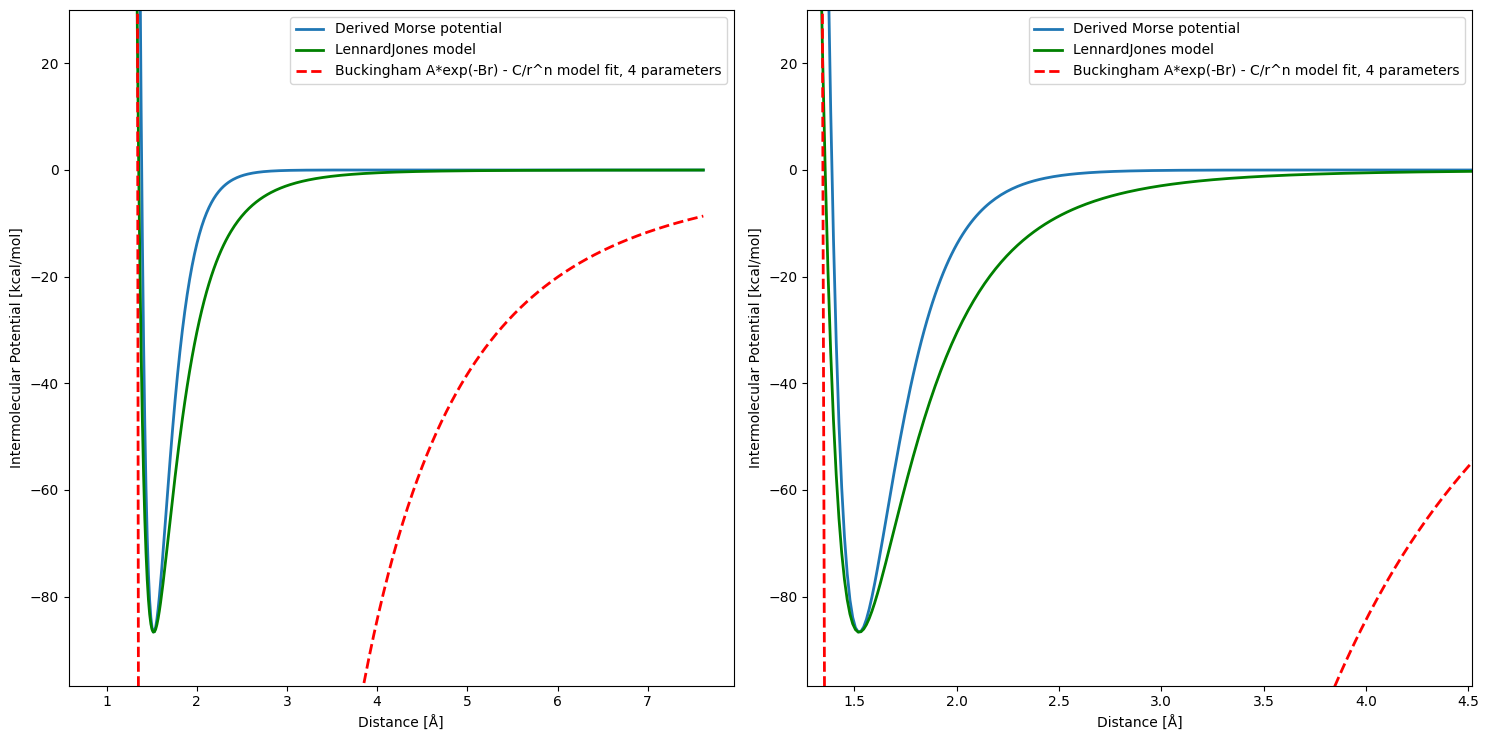

In [2]:
#PSS -------------------------------------------------------------------------------------- User Input Begins Here ------------------------------------------------------------------------------------------- #PSS

#PSS -------------------------------------------------------------------------------------- Morse Potential Input ------------------------------------------------------------------------------------------- #PSS

#PSS inputs from BF of interest:
#PSS BDE [kcal/mol], frequencies for indistiguishable bonds [1/cm], fragment masses [amu], equillibrium bond lengths [angstroms].

# BDE [kcal/mol], frequencies for indistiguishable bonds [1/cm], fragment masses [amu], equillibrium bond lengths [angstroms].
#heptane
#P2 
#De_kcal, frequencies, m1, m2, r0 = 86.80101105, np.array([306.79,1020.86,1062.50,1087.66,1417.53]), 43.09,57.11,1.52315
#P3
# De_kcal, frequencies, m1, m2, r0 = 83.0079965, np.array([487.52,1062.50,1090.05]), 29.06,71.14,1.52367
#P4
De_kcal, frequencies, m1, m2, r0 = 86.67343252, np.array([1062.50,3095.19]), 85.17,15.03,1.52325
#P5
#De_kcal, frequencies, m1, m2, r0 = 98.6831241, np.array([3053.64,3061.25,3087.37,3095.19]), 1.01,99.19,1.09468
#P6
#De_kcal, frequencies, m1, m2, r0 = 98.68968695, np.array([3053.64,3074.98,3095.19]), 1.01,99.19,1.09458
#P7
#De_kcal, frequencies, m1, m2, r0 = 98.82847637, np.array([3049.40,3051.44,3061.25,3074.98,3087.37,3095.19]), 1.01,99.19,1.09314
#P8
#De_kcal, frequencies, m1, m2, r0 = 100.3478659, np.array([3057.45,3057.79,3124.46,3124.68,3133.18,3133.30]), 1.01,99.19,1.09053

#PSS -------------------------------------------------------------------------------------- Linespce Input ------------------------------------------------------------------------------------------- #PSS


#PSS linespace for the Morse potential
#PSS Very important! Need modifications by user to get a better fit!

rStart  = 0.6        #UserInput
rEnd    = 5          #UserInput
npoints = 500      #UserInput

#PSS crates an array of r values which is shifted from equilibrium bond length by 
#PSS rStart times on left and rEnd times on right and in between npoints number of r values are created

r_vals = np.linspace(r0 * rStart, r0 * rEnd, npoints) 

#PSS Below line can be ativated to introduce some bias. Not need many most of the times.
#PSS Activating below line may require to modify the above line.

# PSS
# r_vals = np.append(r_vals, [np.linspace(r0*1.1, r0*5, 8000)])  #UserInput. 

# print(r_vals)

# ------------------------------------------------------------------------------------------------------------------------ #

sigma = r0/2**(1/6)
epsilon = De_kcal

# ------------------------------------------------------------------------------------------------------------------------ #

#PSS -------------------------------------------------------------------------------------- Buckingham Curve Fit Input ------------------------------------------------------------------------------------------- #PSS

#PSS Very important! Need modifications by user to get a fit quicker!
GuessBuckingham = (4*epsilon*sigma**12, 5, 4*epsilon*sigma**6, 6)
BoundsBuckingham = ([0, 0, 0, 2], [np.inf, np.inf, np.inf, 12])
IterBuckingham = 5000000

#PSS -------------------------------------------------------------------------------------- User Input Ends Here ------------------------------------------------------------------------------------------- #PSS



# -------------------------------------------------------------------------------------- Fit Script ------------------------------------------------------------------------------------------- #

#bond dissociation energy 'De' [J] converted from kcal/mol
De = (De_kcal * 4184) / 6.022e23

#averaged harmonic oscillator frequency 'nu' [1/s] converted from 1/cm using speed of light c
nu = np.mean(frequencies) * 2.998e10

#reduced mass 'mu' [kg] converted from amu
mu = 1/((1/m1)+(1/m2)) * 1.6605e-27

#curvature parameter 'alpha' [1/angstrom] converted from 1/m
alpha = 2*np.pi*nu*np.sqrt(mu/(2*De)) / 1e10

#Morse potential - sympy function
r = sp.Symbol('r')

#shifts Morse potential down by the BDE for the power law fit
V_morse = De_kcal*(1 - sp.exp(-alpha*(r-r0)))**2 - De_kcal 

Vs = [V_morse.subs(r, val) for val in r_vals]

print(f"Minimum morse potential {min(Vs)} at radius {r_vals[np.argmin(Vs)]}")


def PowerLawAttr(r, c, n):
    return -c*r**(-n)

#fitting for 'a' and 'c'
def power_law(r, a, c,  m = 12, n = 6):
    return (a*r**(-m)) - (c*r**(-n))

# Lennard Jonnes n-m Potential
def LennardJonesFit(r, m, n):
    return 4*epsilon*(((sigma/r)**m)- ((sigma/r)**n))

# Lennard Jonnes 6-12 Potential
def LennardJones(r, sigma, epsilon, m = 12, n = 6):
    return 4*epsilon*((sigma/r)**m - (sigma/r)**n)

# Modified Buckingham Potential
def Buckingham(r, A, B, C, n = 6):
    return A*np.exp(-B*r) - C*r**(-n)

# Modified Buckingham Potential with reduction in coeffecients
def Buckingham3(r, B, C, n = 6):
    return ((C*r0**(-n-1))/(B*np.exp(-B*r0)))*np.exp(-B*r) - C*r**(-n)

# ------------------------------------------------------------------------------Morse Potential------------------------------------------------------------------------------------------------ #

fig, ax = plt.subplots(1, 2, figsize=(15,7.5), dpi=100)

ax[0].plot(r_vals, Vs, label='Derived Morse potential', linewidth=2)
ax[1].plot(r_vals, Vs, label='Derived Morse potential', linewidth=2)
# ax[0].set_title('Morse Potential and power law fit', fontsize=20)
ax[0].set_xlabel('Distance [\u212B]', fontsize=10)
ax[0].set_ylabel('Intermolecular Potential [kcal/mol]', fontsize=10)

# ------------------------------------------------------------------------------LJ Potential------------------------------------------------------------------------------------------------ #

# popt, pcov = curve_fit(LennardJones, r_vals, Vs, p0=(6), bounds=([2], [12]), maxfev=5000000)

print(f'LennardJones Fit: sigma = {sigma} , epsilon = {epsilon}, m = 12, n= 6')

ax[0].plot(r_vals, LennardJones(r_vals, sigma, epsilon),
           'g-', linewidth=2, label='LennardJones model')

ax[1].plot(r_vals, LennardJones(r_vals, sigma, epsilon),
           'g-', linewidth=2, label='LennardJones model')

# -------------------------------------------------------------------------Modified Buckingham Potential----------------------------------------------------------------------------------- #

popt, pcov = curve_fit(Buckingham, r_vals, Vs, p0=GuessBuckingham, bounds=BoundsBuckingham, maxfev=IterBuckingham) 

print(f'Fit: Buckingham A = {round(popt[0], 2)} [Kcal/mol], B = {round(popt[1], 2)} [1/Angstrom], C = {round(popt[2], 2)} [Kcal/mol], n= {round(popt[3], 2)}')
print(f'Fit: Buckingham A = {round(popt[0]/630, 2)} [Hartrees], B = {round(popt[1], 2)} [1/Angstrom], C = {round(popt[2]/630, 2)} [Hartrees], n= {round(popt[3], 2)}')

ax[0].plot(r_vals, Buckingham(r_vals, *popt),
           'r--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 4 parameters')

ax[1].plot(r_vals, Buckingham(r_vals, *popt), 
           'r--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 4 parameters')

# ------------------------------------------------------------Modified Buckingham Potential with reduction in coeffecients------------------------------------------------------------------- #

# popt, pcov = curve_fit(Buckingham3, r_vals, Vs, p0=(5, 100, 6), bounds=([0, 0, 2], [np.inf, np.inf, 12]), maxfev=5000000)
# print(f'Fit: Buckingham3 B = {round(popt[0], 2)} [1/Angstrom], C = {round(popt[1], 2)} [Kcal/mol], n= {round(popt[2], 2)}')
# print(f'Fit: Buckingham3 B = {round(popt[0], 2)} [1/Angstrom], C = {round(popt[1]/630, 2)} [Hartrees], n= {round(popt[2], 2)}')

# ax[0].plot(r_vals, Buckingham(r_vals, *popt),
#            '--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 3 parameters')

# ax[1].plot(r_vals, Buckingham(r_vals, *popt), 
#            '--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 3 parameters')

# ----------------------------------------------------------------------------Plot Parameters-------------------------------------------------------------------------------------------------- #

#PSS User can modify the followinf parameters to get the plot in desired format

# ----------------------------------------------------------------------- ax[0] represents left plot ------------------------------------------------------------------------------------------- #
ax[0].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

ax[0].legend(fontsize=10, loc="best")

LeftPlotTopShift = 10   #UserInput

ax[0].set_ylim([-De_kcal - LeftPlotTopShift, 30])

# ax[0].set_title('Morse Potential and power law fit', fontsize=20)

# ----------------------------------------------------------------------- ax[1] represents right plot --------------------------------------------------------------------------------------------- #

ax[1].set_xlabel('Distance [\u212B]', fontsize=10)
ax[1].set_ylabel('Intermolecular Potential [kcal/mol]', fontsize=10)
 
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

ax[1].legend(fontsize=10, loc="best")
RightPlotLeftShift = 0.25   #UserInput
RightPlotRightShift = 3     #UserInput

ax[1].set_xlim([r_vals[np.argmin(Vs)] - RightPlotLeftShift, r_vals[np.argmin(Vs)] + RightPlotRightShift])

RightPlotTopShift = 10      #UserInput
ax[1].set_ylim([-De_kcal - RightPlotTopShift, 30])

fig.tight_layout()

plt.show()

# M2M Dummy

Minimum morse potential -81.3858058710740 at radius 1.4128101120224046
LennardJones Fit: sigma = 1.2581717146936942 , epsilon = 81.386, m = 12, n= 6
Fit: Buckingham A = 376936.45 [Kcal/mol], B = 6.16 [1/Angstrom], C = 520.9 [Kcal/mol], n= 3.87
Fit: Buckingham A = 598.31 [Hartrees], B = 6.16 [1/Angstrom], C = 0.83 [Hartrees], n= 3.87


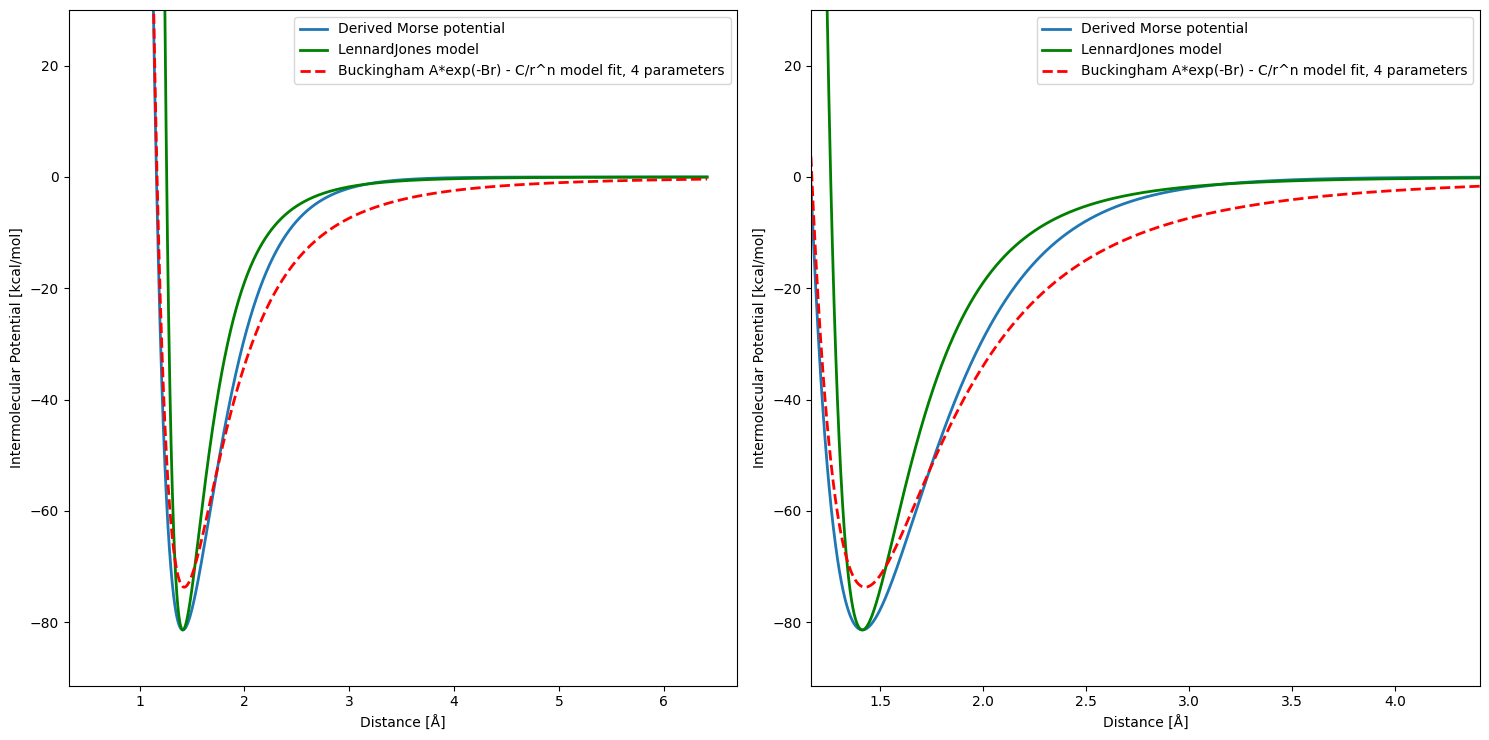

In [ ]:
#PSS -------------------------------------------------------------------------------------- User Input Begins Here ------------------------------------------------------------------------------------------- #PSS

#PSS -------------------------------------------------------------------------------------- Morse Potential Input ------------------------------------------------------------------------------------------- #PSS

#PSS inputs from BF of interest:
#PSS BDE [kcal/mol], frequencies for indistiguishable bonds [1/cm], fragment masses [amu], equillibrium bond lengths [angstroms].

# [CH3] + [O]COC
De_kcal, frequencies, m1, m2, r0 = 81.386, np.array([1200.65, 1237.01, 992.59, 973.08]), 15.03, 61.06, 1.41225
# CH3[O] + [C]OC
# De_kcal, frequencies, m1, m2, r0 = 87.896, np.array([1200.65, 1237.01, 992.59, 973.08]), 31.03, 45.06, 1.39410
# [CH2]OCOC + [H]
# De_kcal, frequencies, m1, m2, r0 = 96.044, np.array([3159.52, 3159.24, 3097.66, 3096.92, 3030.88, 3029.53]), 1.01, 75.09, 1.09500
# CO[CH]OC + [H]
# De_kcal, frequencies, m1, m2, r0 = 96.283, np.array([3038.38, 3089.09]), 1.01, 75.09, 1.09414

#PSS -------------------------------------------------------------------------------------- Linespce Input ------------------------------------------------------------------------------------------- #PSS


#PSS linespace for the Morse potential
#PSS Very important! Need modifications by user to get a better fit!

rStart  = 0.6        #UserInput
rEnd    = 5          #UserInput
npoints = 5000      #UserInput

#PSS crates an array of r values which is shifted from equilibrium bond length by 
#PSS rStart times on left and rEnd times on right and in between npoints number of r values are created

r_vals = np.linspace(r0 * rStart, r0 * rEnd, npoints) 

#PSS Below line can be ativated to introduce some bias. Not need many most of the times.
#PSS Activating below line may require to modify the above line.

# PSS 
# r_vals = np.append(r_vals, [np.linspace(r0*1.1, r0*5, 8000)])  #UserInput. 

# print(r_vals)

#PSS -------------------------------------------------------------------------------------- Buckingham Curve Fit Input ------------------------------------------------------------------------------------------- #PSS

#PSS Very important! Need modifications by user to get a fit quicker!
GuessBuckingham = (10000, 5, 100, 5)
BoundsBuckingham = ([0, 0, 0, 2], [np.inf, np.inf, np.inf, 12])
IterBuckingham = 5000000

#PSS -------------------------------------------------------------------------------------- User Input Ends Here ------------------------------------------------------------------------------------------- #PSS



# -------------------------------------------------------------------------------------- Fit Script ------------------------------------------------------------------------------------------- #

#bond dissociation energy 'De' [J] converted from kcal/mol
De = (De_kcal * 4184) / 6.022e23

#averaged harmonic oscillator frequency 'nu' [1/s] converted from 1/cm using speed of light c
nu = np.mean(frequencies) * 2.998e10

#reduced mass 'mu' [kg] converted from amu
mu = 1/((1/m1)+(1/m2)) * 1.6605e-27

#curvature parameter 'alpha' [1/angstrom] converted from 1/m
alpha = 2*np.pi*nu*np.sqrt(mu/(2*De)) / 1e10

#Morse potential - sympy function
r = sp.Symbol('r')

#shifts Morse potential down by the BDE for the power law fit
V_morse = De_kcal*(1 - sp.exp(-alpha*(r-r0)))**2 - De_kcal 

Vs = [V_morse.subs(r, val) for val in r_vals]

print(f"Minimum morse potential {min(Vs)} at radius {r_vals[np.argmin(Vs)]}")

# ------------------------------------------------------------------------------------------------------------------------ #

sigma = r0/2**(1/6)
epsilon = De_kcal

# ------------------------------------------------------------------------------------------------------------------------ #

def PowerLawAttr(r, c, n):
    return -c*r**(-n)

#fitting for 'a' and 'c'
def power_law(r, a, c,  m = 12, n = 6):
    return (a*r**(-m)) - (c*r**(-n))

# Lennard Jonnes n-m Potential
def LennardJonesFit(r, m, n):
    return 4*epsilon*(((sigma/r)**m)- ((sigma/r)**n))

# Lennard Jonnes 6-12 Potential
def LennardJones(r, sigma, epsilon, m = 12, n = 6):
    return 4*epsilon*((sigma/r)**m - (sigma/r)**n)

# Modified Buckingham Potential
def Buckingham(r, A, B, C, n = 6):
    return A*np.exp(-B*r) - C*r**(-n)

# Modified Buckingham Potential with reduction in coeffecients
def Buckingham3(r, B, C, n = 6):
    return ((C*r0**(-n-1))/(B*np.exp(-B*r0)))*np.exp(-B*r) - C*r**(-n)

# ------------------------------------------------------------------------------Morse Potential------------------------------------------------------------------------------------------------ #

fig, ax = plt.subplots(1, 2, figsize=(15,7.5), dpi=100)

ax[0].plot(r_vals, Vs, label='Derived Morse potential', linewidth=2)
ax[1].plot(r_vals, Vs, label='Derived Morse potential', linewidth=2)
# ax[0].set_title('Morse Potential and power law fit', fontsize=20)
ax[0].set_xlabel('Distance [\u212B]', fontsize=10)
ax[0].set_ylabel('Intermolecular Potential [kcal/mol]', fontsize=10)

# ------------------------------------------------------------------------------LJ Potential------------------------------------------------------------------------------------------------ #

# popt, pcov = curve_fit(LennardJones, r_vals, Vs, p0=(6), bounds=([2], [12]), maxfev=5000000)

print(f'LennardJones Fit: sigma = {sigma} , epsilon = {epsilon}, m = 12, n= 6')

ax[0].plot(r_vals, LennardJones(r_vals, sigma, epsilon),
           'g-', linewidth=2, label='LennardJones model')

ax[1].plot(r_vals, LennardJones(r_vals, sigma, epsilon),
           'g-', linewidth=2, label='LennardJones model')

# -------------------------------------------------------------------------Modified Buckingham Potential----------------------------------------------------------------------------------- #

popt, pcov = curve_fit(Buckingham, r_vals, Vs, p0=GuessBuckingham, bounds=BoundsBuckingham, maxfev=IterBuckingham) 

print(f'Fit: Buckingham A = {round(popt[0], 2)} [Kcal/mol], B = {round(popt[1], 2)} [1/Angstrom], C = {round(popt[2], 2)} [Kcal/mol], n= {round(popt[3], 2)}')
print(f'Fit: Buckingham A = {round(popt[0]/630, 2)} [Hartrees], B = {round(popt[1], 2)} [1/Angstrom], C = {round(popt[2]/630, 2)} [Hartrees], n= {round(popt[3], 2)}')

ax[0].plot(r_vals, Buckingham(r_vals, *popt),
           'r--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 4 parameters')

ax[1].plot(r_vals, Buckingham(r_vals, *popt), 
           'r--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 4 parameters')

# ------------------------------------------------------------Modified Buckingham Potential with reduction in coeffecients------------------------------------------------------------------- #

# popt, pcov = curve_fit(Buckingham3, r_vals, Vs, p0=(5, 100, 6), bounds=([0, 0, 2], [np.inf, np.inf, 12]), maxfev=5000000)
# print(f'Fit: Buckingham3 B = {round(popt[0], 2)} [1/Angstrom], C = {round(popt[1], 2)} [Kcal/mol], n= {round(popt[2], 2)}')
# print(f'Fit: Buckingham3 B = {round(popt[0], 2)} [1/Angstrom], C = {round(popt[1]/630, 2)} [Hartrees], n= {round(popt[2], 2)}')

# ax[0].plot(r_vals, Buckingham(r_vals, *popt),
#            '--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 3 parameters')

# ax[1].plot(r_vals, Buckingham(r_vals, *popt), 
#            '--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 3 parameters')

# ----------------------------------------------------------------------------Plot Parameters-------------------------------------------------------------------------------------------------- #

#PSS User can modify the followinf parameters to get the plot in desired format

# ----------------------------------------------------------------------- ax[0] represents left plot ------------------------------------------------------------------------------------------- #
ax[0].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

ax[0].legend(fontsize=10, loc="best")

LeftPlotTopShift = 10   #UserInput

ax[0].set_ylim([-De_kcal - LeftPlotTopShift, 30])

# ax[0].set_title('Morse Potential and power law fit', fontsize=20)

# ----------------------------------------------------------------------- ax[1] represents right plot --------------------------------------------------------------------------------------------- #

ax[1].set_xlabel('Distance [\u212B]', fontsize=10)
ax[1].set_ylabel('Intermolecular Potential [kcal/mol]', fontsize=10)
 
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

ax[1].legend(fontsize=10, loc="best")
RightPlotLeftShift = 0.25   #UserInput
RightPlotRightShift = 3     #UserInput

ax[1].set_xlim([r_vals[np.argmin(Vs)] - RightPlotLeftShift, r_vals[np.argmin(Vs)] + RightPlotRightShift])

RightPlotTopShift = 10      #UserInput
ax[1].set_ylim([-De_kcal - RightPlotTopShift, 30])

fig.tight_layout()

plt.show()

# M3M Dummy

Minimum morse potential -81.3858058710740 at radius 1.4128101120224046
LennardJones Fit: sigma = 1.2581717146936942 , epsilon = 81.386, m = 12, n= 6
Fit: Buckingham A = 376936.45 [Kcal/mol], B = 6.16 [1/Angstrom], C = 520.9 [Kcal/mol], n= 3.87
Fit: Buckingham A = 598.31 [Hartrees], B = 6.16 [1/Angstrom], C = 0.83 [Hartrees], n= 3.87


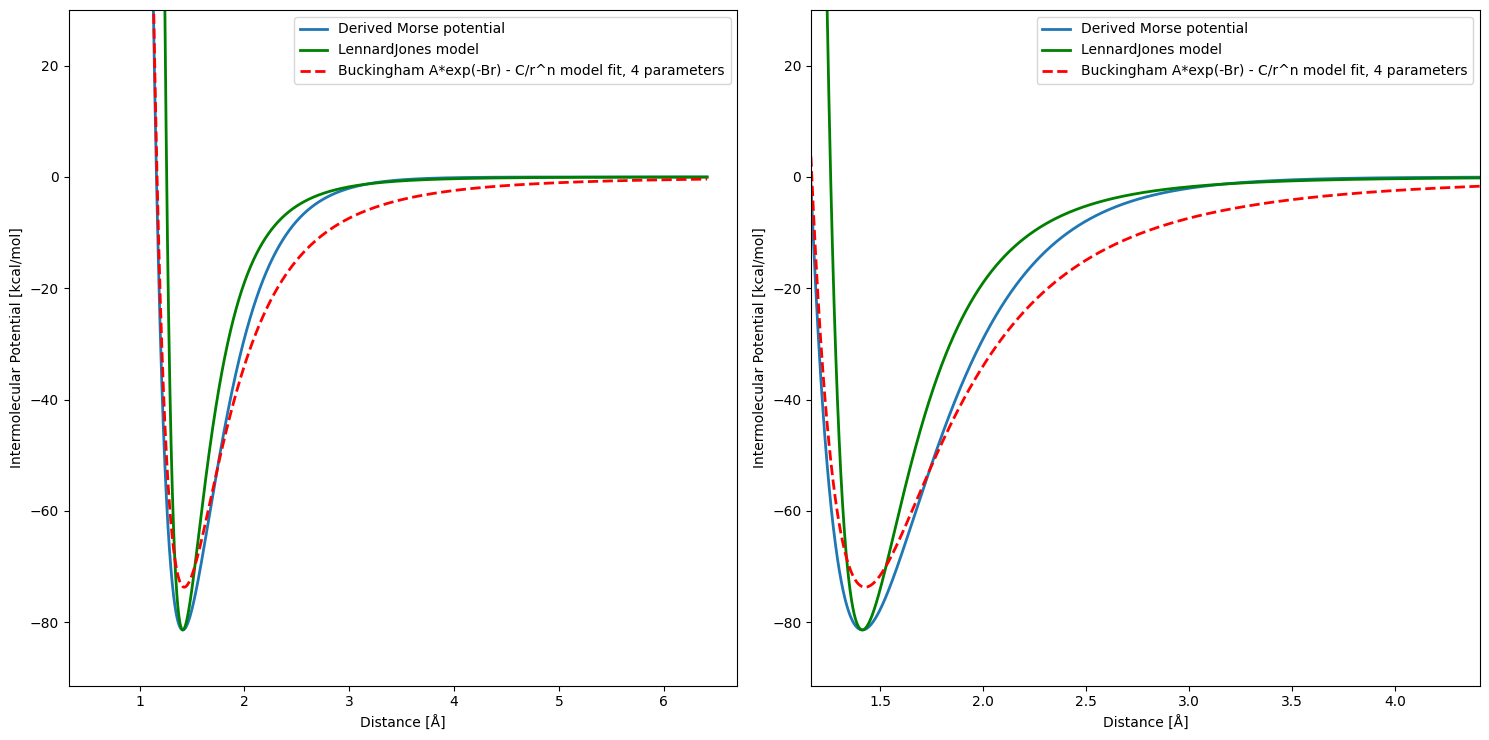

In [ ]:
#PSS -------------------------------------------------------------------------------------- User Input Begins Here ------------------------------------------------------------------------------------------- #PSS

#PSS -------------------------------------------------------------------------------------- Morse Potential Input ------------------------------------------------------------------------------------------- #PSS

#PSS inputs from BF of interest:
#PSS BDE [kcal/mol], frequencies for indistiguishable bonds [1/cm], fragment masses [amu], equillibrium bond lengths [angstroms].

# [CH3] + [O]COC
De_kcal, frequencies, m1, m2, r0 = 81.386, np.array([1200.65, 1237.01, 992.59, 973.08]), 15.03, 61.06, 1.41225
# CH3[O] + [C]OC
# De_kcal, frequencies, m1, m2, r0 = 87.896, np.array([1200.65, 1237.01, 992.59, 973.08]), 31.03, 45.06, 1.39410
# [CH2]OCOC + [H]
# De_kcal, frequencies, m1, m2, r0 = 96.044, np.array([3159.52, 3159.24, 3097.66, 3096.92, 3030.88, 3029.53]), 1.01, 75.09, 1.09500
# CO[CH]OC + [H]
# De_kcal, frequencies, m1, m2, r0 = 96.283, np.array([3038.38, 3089.09]), 1.01, 75.09, 1.09414

#PSS -------------------------------------------------------------------------------------- Linespce Input ------------------------------------------------------------------------------------------- #PSS


#PSS linespace for the Morse potential
#PSS Very important! Need modifications by user to get a better fit!

rStart  = 0.6        #UserInput
rEnd    = 5          #UserInput
npoints = 5000      #UserInput

#PSS crates an array of r values which is shifted from equilibrium bond length by 
#PSS rStart times on left and rEnd times on right and in between npoints number of r values are created

r_vals = np.linspace(r0 * rStart, r0 * rEnd, npoints) 

#PSS Below line can be ativated to introduce some bias. Not need many most of the times.
#PSS Activating below line may require to modify the above line.

# PSS 
# r_vals = np.append(r_vals, [np.linspace(r0*1.1, r0*5, 8000)])  #UserInput. 

# print(r_vals)

#PSS -------------------------------------------------------------------------------------- Buckingham Curve Fit Input ------------------------------------------------------------------------------------------- #PSS

#PSS Very important! Need modifications by user to get a fit quicker!
GuessBuckingham = (10000, 5, 100, 5)
BoundsBuckingham = ([0, 0, 0, 2], [np.inf, np.inf, np.inf, 12])
IterBuckingham = 5000000

#PSS -------------------------------------------------------------------------------------- User Input Ends Here ------------------------------------------------------------------------------------------- #PSS



# -------------------------------------------------------------------------------------- Fit Script ------------------------------------------------------------------------------------------- #

#bond dissociation energy 'De' [J] converted from kcal/mol
De = (De_kcal * 4184) / 6.022e23

#averaged harmonic oscillator frequency 'nu' [1/s] converted from 1/cm using speed of light c
nu = np.mean(frequencies) * 2.998e10

#reduced mass 'mu' [kg] converted from amu
mu = 1/((1/m1)+(1/m2)) * 1.6605e-27

#curvature parameter 'alpha' [1/angstrom] converted from 1/m
alpha = 2*np.pi*nu*np.sqrt(mu/(2*De)) / 1e10

#Morse potential - sympy function
r = sp.Symbol('r')

#shifts Morse potential down by the BDE for the power law fit
V_morse = De_kcal*(1 - sp.exp(-alpha*(r-r0)))**2 - De_kcal 

Vs = [V_morse.subs(r, val) for val in r_vals]

print(f"Minimum morse potential {min(Vs)} at radius {r_vals[np.argmin(Vs)]}")

# ------------------------------------------------------------------------------------------------------------------------ #

sigma = r0/2**(1/6)
epsilon = De_kcal

# ------------------------------------------------------------------------------------------------------------------------ #

def PowerLawAttr(r, c, n):
    return -c*r**(-n)

#fitting for 'a' and 'c'
def power_law(r, a, c,  m = 12, n = 6):
    return (a*r**(-m)) - (c*r**(-n))

# Lennard Jonnes n-m Potential
def LennardJonesFit(r, m, n):
    return 4*epsilon*(((sigma/r)**m)- ((sigma/r)**n))

# Lennard Jonnes 6-12 Potential
def LennardJones(r, sigma, epsilon, m = 12, n = 6):
    return 4*epsilon*((sigma/r)**m - (sigma/r)**n)

# Modified Buckingham Potential
def Buckingham(r, A, B, C, n = 6):
    return A*np.exp(-B*r) - C*r**(-n)

# Modified Buckingham Potential with reduction in coeffecients
def Buckingham3(r, B, C, n = 6):
    return ((C*r0**(-n-1))/(B*np.exp(-B*r0)))*np.exp(-B*r) - C*r**(-n)

# ------------------------------------------------------------------------------Morse Potential------------------------------------------------------------------------------------------------ #

fig, ax = plt.subplots(1, 2, figsize=(15,7.5), dpi=100)

ax[0].plot(r_vals, Vs, label='Derived Morse potential', linewidth=2)
ax[1].plot(r_vals, Vs, label='Derived Morse potential', linewidth=2)
# ax[0].set_title('Morse Potential and power law fit', fontsize=20)
ax[0].set_xlabel('Distance [\u212B]', fontsize=10)
ax[0].set_ylabel('Intermolecular Potential [kcal/mol]', fontsize=10)

# ------------------------------------------------------------------------------LJ Potential------------------------------------------------------------------------------------------------ #

# popt, pcov = curve_fit(LennardJones, r_vals, Vs, p0=(6), bounds=([2], [12]), maxfev=5000000)

print(f'LennardJones Fit: sigma = {sigma} , epsilon = {epsilon}, m = 12, n= 6')

ax[0].plot(r_vals, LennardJones(r_vals, sigma, epsilon),
           'g-', linewidth=2, label='LennardJones model')

ax[1].plot(r_vals, LennardJones(r_vals, sigma, epsilon),
           'g-', linewidth=2, label='LennardJones model')

# -------------------------------------------------------------------------Modified Buckingham Potential----------------------------------------------------------------------------------- #

popt, pcov = curve_fit(Buckingham, r_vals, Vs, p0=GuessBuckingham, bounds=BoundsBuckingham, maxfev=IterBuckingham) 

print(f'Fit: Buckingham A = {round(popt[0], 2)} [Kcal/mol], B = {round(popt[1], 2)} [1/Angstrom], C = {round(popt[2], 2)} [Kcal/mol], n= {round(popt[3], 2)}')
print(f'Fit: Buckingham A = {round(popt[0]/630, 2)} [Hartrees], B = {round(popt[1], 2)} [1/Angstrom], C = {round(popt[2]/630, 2)} [Hartrees], n= {round(popt[3], 2)}')

ax[0].plot(r_vals, Buckingham(r_vals, *popt),
           'r--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 4 parameters')

ax[1].plot(r_vals, Buckingham(r_vals, *popt), 
           'r--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 4 parameters')

# ------------------------------------------------------------Modified Buckingham Potential with reduction in coeffecients------------------------------------------------------------------- #

# popt, pcov = curve_fit(Buckingham3, r_vals, Vs, p0=(5, 100, 6), bounds=([0, 0, 2], [np.inf, np.inf, 12]), maxfev=5000000)
# print(f'Fit: Buckingham3 B = {round(popt[0], 2)} [1/Angstrom], C = {round(popt[1], 2)} [Kcal/mol], n= {round(popt[2], 2)}')
# print(f'Fit: Buckingham3 B = {round(popt[0], 2)} [1/Angstrom], C = {round(popt[1]/630, 2)} [Hartrees], n= {round(popt[2], 2)}')

# ax[0].plot(r_vals, Buckingham(r_vals, *popt),
#            '--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 3 parameters')

# ax[1].plot(r_vals, Buckingham(r_vals, *popt), 
#            '--', linewidth=2, label='Buckingham A*exp(-Br) - C/r^n model fit, 3 parameters')

# ----------------------------------------------------------------------------Plot Parameters-------------------------------------------------------------------------------------------------- #

#PSS User can modify the followinf parameters to get the plot in desired format

# ----------------------------------------------------------------------- ax[0] represents left plot ------------------------------------------------------------------------------------------- #
ax[0].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

ax[0].legend(fontsize=10, loc="best")

LeftPlotTopShift = 10   #UserInput

ax[0].set_ylim([-De_kcal - LeftPlotTopShift, 30])

# ax[0].set_title('Morse Potential and power law fit', fontsize=20)

# ----------------------------------------------------------------------- ax[1] represents right plot --------------------------------------------------------------------------------------------- #

ax[1].set_xlabel('Distance [\u212B]', fontsize=10)
ax[1].set_ylabel('Intermolecular Potential [kcal/mol]', fontsize=10)
 
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

ax[1].legend(fontsize=10, loc="best")
RightPlotLeftShift = 0.25   #UserInput
RightPlotRightShift = 3     #UserInput

ax[1].set_xlim([r_vals[np.argmin(Vs)] - RightPlotLeftShift, r_vals[np.argmin(Vs)] + RightPlotRightShift])

RightPlotTopShift = 10      #UserInput
ax[1].set_ylim([-De_kcal - RightPlotTopShift, 30])

fig.tight_layout()

plt.show()